In [1]:
import matplotlib.pyplot as plt
import seaborn as sns

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats

import warnings
warnings.filterwarnings("ignore")

pd.set_option('display.max_columns', None)

import prep
import wrangle

prep.py functions loaded successfully
wrangle.py functions loaded successfully


# Prep Data

In [2]:
# call function to prep the csv data
df = prep.prep_asd_data()

In [3]:
df.head()

,case_no,a1,a2,a3,a4,a5,a6,a7,a8,a9,a10,age_mons,survey_score,ethnicity,whocompletedthetest,is_male,has_jaundice,has_fam_history,has_asd,is_white,is_hispanic,is_black,is_asian,is_middle_eastern,is_other
0,1,0,0,0,0,0,0,1,1,0,1,28,3,middle eastern,family member,0,1,0,0,0,0,0,0,1,0
1,2,1,1,0,0,0,1,1,0,0,0,36,4,White European,family member,1,1,0,1,1,0,0,0,0,0
2,3,1,0,0,0,0,0,1,1,0,1,36,4,middle eastern,family member,1,1,0,1,0,0,0,0,1,0
3,4,1,1,1,1,1,1,1,1,1,1,24,10,Hispanic,family member,1,0,0,1,0,1,0,0,0,0
4,5,1,1,0,1,1,1,1,1,1,1,20,9,White European,family member,0,0,1,1,1,0,0,0,0,0


In [4]:
# check for nulls, data had no nulls to begin with
df.isnull().sum()

case_no                0
a1                     0
a2                     0
a3                     0
a4                     0
a5                     0
a6                     0
a7                     0
a8                     0
a9                     0
a10                    0
age_mons               0
survey_score           0
ethnicity              0
whocompletedthetest    0
is_male                0
has_jaundice           0
has_fam_history        0
has_asd                0
is_white               0
is_hispanic            0
is_black               0
is_asian               0
is_middle_eastern      0
is_other               0
dtype: int64

# Explore Data

(array([0, 1]), <a list of 2 Text major ticklabel objects>)

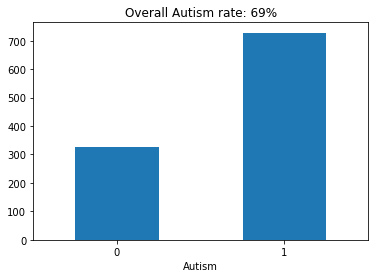

In [5]:
# Check the baseline for data
# Needed for modeling later
df.has_asd.value_counts().sort_index().plot.bar()
autism_rate = df.has_asd.mean()
# Give title and lables for the chart
plt.title(f"Overall Autism rate: {autism_rate:.0%}")
plt.xlabel('Autism')
plt.xticks(rotation = 0)

## Conclusions
- Majority of the children who took assessment, ended up being Autistic

Comparing Autism Rate to Sex and Ethnicity


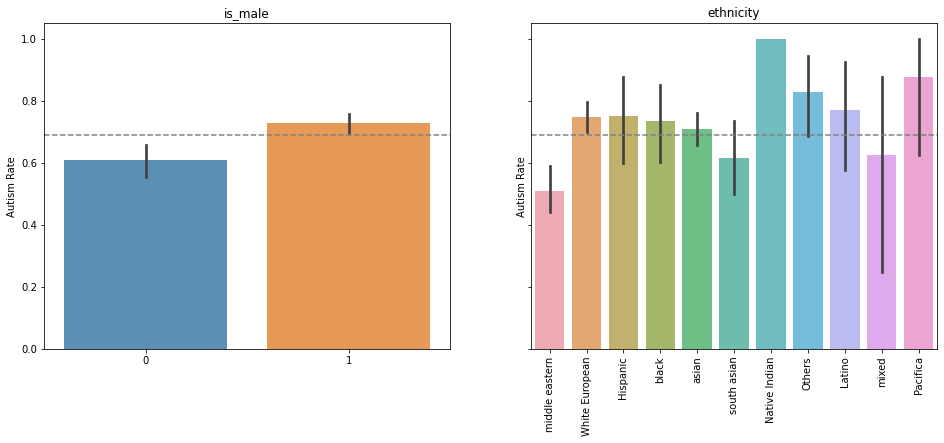

In [6]:
# Create features to visualize
features = ['is_male', 'ethnicity']

# Subplot 2 graphs side by side on the first ron
_, ax = plt.subplots(nrows=1, ncols=2, figsize=(16, 6), sharey=True)
for i, feature in enumerate(features):
    # Bar chart for asd data
    sns.barplot(feature, 'has_asd', data=df, ax=ax[i], alpha=.8)
    ax[i].set_xlabel('')
    ax[i].set_ylabel('Autism Rate')
    ax[i].set_title(feature)
    ax[i].axhline(autism_rate, ls='--', color='grey')
    plt.xticks(rotation = 90)
print('Comparing Autism Rate to Sex and Ethnicity')

## Conclusions
- Males are diagnosed with Autism more than females based on the autism rate
- ethnicity doesn't appear to play a huge factor in whether a child is autistic or not

Text(0.5, 15.0, '')

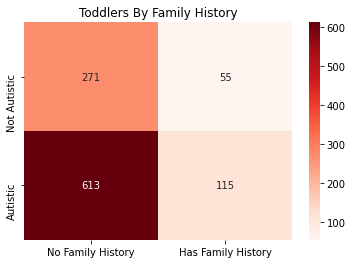

In [7]:
# Create crosstab of data I want to visualize
crosstab = pd.crosstab(df.has_asd, df.has_fam_history)
# Visualizes heatmap to see differences in values
sns.heatmap(crosstab, annot= True, cmap= 'Reds', fmt= 'd')

plt.title('Toddlers By Family History')
locs, labels = plt.yticks()
plt.yticks(locs, ('Not Autistic', 'Autistic'))
plt.xticks(locs, ('No Family History', 'Has Family History'))
plt.ylabel('')
plt.xlabel('')

## Conclusions
- Family history does not appear to be an accurate indicator if a child is autistic or not
- This may not be reliable because typically families don't share their personal medical history

Text(33.0, 0.5, '')

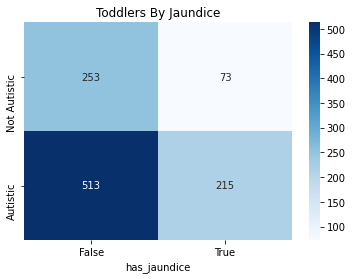

In [8]:
# Same as above, just new features to assess
crosstab = pd.crosstab(df.has_asd, df.has_jaundice)
sns.heatmap(crosstab, annot= True, cmap= 'Blues', fmt= 'd')

plt.title('Toddlers By Jaundice')
locs, labels = plt.yticks()
plt.yticks(locs, ('Not Autistic', 'Autistic'))
plt.xticks(locs, ('False', 'True'))
plt.ylabel('')

## Conclusion
- A child having jaundice doesn't appear to be correlated to autism at all

Text(33.0, 0.5, '')

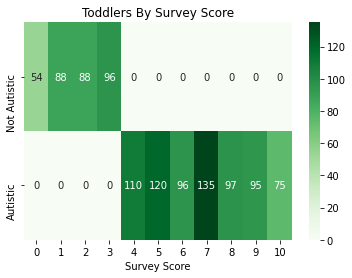

In [9]:
# Assessing same graph on survey score vs asd
crosstab = pd.crosstab(df.has_asd, df.survey_score)
sns.heatmap(crosstab, annot= True, cmap= 'Greens', fmt= 'd')

plt.title('Toddlers By Survey Score')
locs, labels = plt.yticks()
plt.yticks(locs, ('Not Autistic', 'Autistic'))
plt.xlabel('Survey Score')
plt.ylabel('')

## Conclusions
- It appears that a child who scores higher than a 3 on the survey, they are more than likely autistic
- This is a good starting point for modeling or feature engineering

Comparing If Certain Questions Are More Correlated To Autism


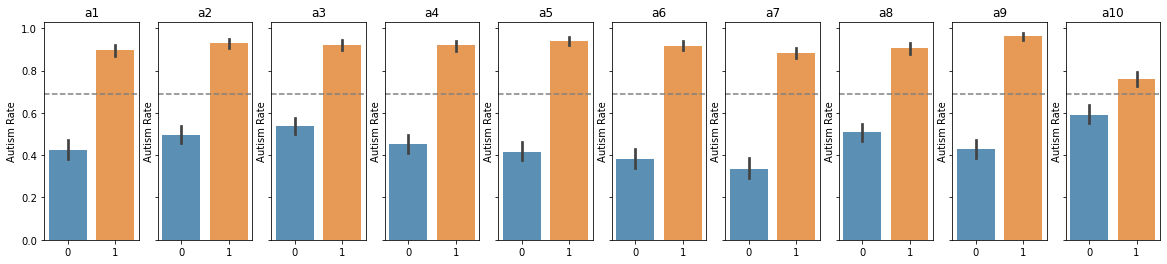

In [10]:
# List all the questions
features = ['a1', 'a2', 'a3', 'a4', 'a5', 'a6', 'a7', 'a8', 'a9', 'a10']

# subplot each questions side by side
# adding a line to measure where average autism rating is
_, ax = plt.subplots(nrows=1, ncols=10, figsize=(20, 4), sharey=True)
for i, feature in enumerate(features):
    sns.barplot(feature, 'has_asd', data=df, ax=ax[i], alpha=.8)
    ax[i].set_xlabel('')
    ax[i].set_ylabel('Autism Rate')
    ax[i].set_title(feature)
    ax[i].axhline(autism_rate, ls='--', color='grey')
print('Comparing If Certain Questions Are More Correlated To Autism')

## Conclusions
- It appears that question 1, 4, 5, 6, 7, and 9 are the most effective at differentiating a child with asd or not
- This set of graphs shows a clear distiction that these questions are more of a intake diagnostic for asd, rather than a behavioral survey.
- Creating a model that can predict on these questions will be vital to success of the models.

# Hypothesis Testing

### First Hypothesis Test

H0: There is no difference in survey scores between children with Autism and all children tested

Ha: There is a difference in survey scores between children with Autism and all children tested

In [11]:
alpha= .05
asd = df[df.has_asd == 1]
t, p = stats.ttest_1samp(asd.survey_score, df.survey_score.mean())

print(f't = {t:.2f}')
print(f'p = {p:.90f}')

t = 22.12
p = 0.000000000000000000000000000000000000000000000000000000000000000000000000000000000025146311


In [12]:
print(f'Our p-value is less than our alpha: {p < alpha}')

Our p-value is less than our alpha: True


## Conclusions
- There is a significant difference between survey scores for children with and without Autism

### Second Hypothesis Test

H0: A child having Autism is independent of type of having family history of Autism

Ha: A child having Autism is not independent of type of having family history of Autism

In [13]:
crosstab = pd.crosstab(df.has_asd, df.has_fam_history)
crosstab

has_fam_history,0,1
has_asd,,
0,271,55
1,613,115


In [14]:
Chi2, p, degf, expected = stats.chi2_contingency(crosstab)

In [15]:
print(f'Our p-value is {p}.')

Our p-value is 0.7280135289450824.


In [16]:
print(f'Our p-value is less than our alpha: {p < alpha}')

Our p-value is less than our alpha: False


## Conclusions
- There is no significant difference between children with family history of Autism and those who don't
- This may be due to lack of knowledge on individual's family history
- This feature may not prove to be useful on modeling

### Third Hypothesis Test

H0: Sex of child is independent of child having Austism

Ha: Sex of child is not independent of child having Autism

In [17]:
crosstab = pd.crosstab(df.has_asd, df.is_male)
crosstab

is_male,0,1
has_asd,,
0,125,201
1,194,534


In [18]:
Chi2, p, degf, expected = stats.chi2_contingency(crosstab)

In [19]:
print(f'Our p-value is {p}.')

Our p-value is 0.00017862515488223135.


In [20]:
print(f'Our p-value is less than our alpha: {p < alpha}')

Our p-value is less than our alpha: True


## Conclusion
- Sex of child is not independent and is consistent with my inital thoughts that males are diagnosed autistic more than females
- This will prove to be a valiable feature when I begin modeling

# Modeling

In [21]:
# Import the functions I will need for modeling
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix, precision_score, recall_score, accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import mean_squared_error, explained_variance_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier

In [22]:
# use wrangle function to split the data
X_train, y_train, X_validate, y_validate, X_test, y_test = wrangle.train_validate_test(df)

In [23]:
# use wrangle function to scale the data
X_train_scaled, X_validate_scaled, X_test_scaled = wrangle.min_max_scale(X_train, X_validate, X_test)

### Baseline

In [24]:
# Establish our baseline
baseline = (df.has_asd == 1).sum() / df.has_asd.count()
baseline

0.6907020872865275

### Creating A New Feature Using Clustering

In [25]:
X_train_scaled.head()

,a1,a2,a3,a4,a5,a6,a7,a8,a9,a10,age_mons,is_male
988,0.0,0.0,0.0,0.0,1.0,0.0,1.0,1.0,0.0,1.0,1.000000,1.0
281,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,0.0,0.625000,1.0
945,0.0,0.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,0.0,0.125000,1.0
286,0.0,0.0,0.0,0.0,1.0,1.0,1.0,0.0,0.0,1.0,0.791667,1.0
129,1.0,1.0,0.0,1.0,1.0,1.0,1.0,0.0,0.0,1.0,1.000000,1.0


In [26]:
#Import kmeans to create clusters on the questions asked in the survey
from sklearn.cluster import KMeans
X1 = X_train_scaled[['a1', 'a2', 'a3', 'a4', 'a5', 'a6', 'a7', 'a8', 'a9', 'a10']]
X2 = X_validate_scaled[['a1', 'a2', 'a3', 'a4', 'a5', 'a6', 'a7', 'a8', 'a9', 'a10']]
X3 = X_test_scaled[['a1', 'a2', 'a3', 'a4', 'a5', 'a6', 'a7', 'a8', 'a9', 'a10']]
kmeans = KMeans(n_clusters=2)
kmeans.fit(X1)

KMeans(n_clusters=2)

In [27]:
X1.shape

(442, 10)

In [28]:
# add the clusters to the dataframes
X_train_scaled['cluster'] = kmeans.predict(X1)
X_train['cluster'] = kmeans.predict(X1)
X_validate_scaled['cluster'] = kmeans.predict(X2)
X_validate['cluster'] = kmeans.predict(X2)
X_test_scaled['cluster'] = kmeans.predict(X3)
X_test['cluster'] = kmeans.predict(X3)

In [29]:
X_train.groupby('cluster').describe()

a1                                                  a2            \
         count      mean       std  min  25%  50%  75%  max  count      mean   
cluster                                                                        
0        243.0  0.798354  0.402057  0.0  1.0  1.0  1.0  1.0  243.0  0.695473   
1        199.0  0.306533  0.462216  0.0  0.0  0.0  1.0  1.0  199.0  0.246231   

                                               a3                           \
              std  min  25%  50%  75%  max  count      mean       std  min   
cluster                                                                      
0        0.461157  0.0  0.0  1.0  1.0  1.0  243.0  0.674897  0.469380  0.0   
1        0.431901  0.0  0.0  0.0  0.0  1.0  199.0  0.130653  0.337871  0.0   

                                a4                                          \
         25%  50%  75%  max  count      mean       std  min  25%  50%  75%   
cluster                                                                      
0        0.0  1.0  1.0  1.0  243.0  0.810700  0.392556  0.0  1.0  1.0  1.0   
1        0.0  0.0  0.0  1.0  199.0  0.221106  0.416038  0.0  0.0  0.0  0.0   

                 a5                                                  a6  \
         max  count      mean       std  min  25%  50%  75%  max  count   
cluster                                                                   
0        1.0  243.0  0.823045  0.382418  0.0  1.0  1.0  1.0  1.0  243.0   
1        1.0  199.0  0.195980  0.397954  0.0  0.0  0.0  0.0  1.0  199.0   

                                                         a7            \
             mean       std  min  25%  50%  75%  max  count      mean   
cluster                                                                 
0        0.860082  0.347618  0.0  1.0  1.0  1.0  1.0  243.0  0.880658   
1        0.306533  0.462216  0.0  0.0  0.0  1.0  1.0  199.0  0.391960   

                                               a8                           \
              std  min  25%  50%  75%  max  count      mean       std  min   
cluster                                                                      
0        0.324859  0.0  1.0  1.0  1.0  1.0  243.0  0.658436  0.475213  0.0   
1        0.489419  0.0  0.0  0.0  1.0  1.0  199.0  0.221106  0.416038  0.0   

                                a9                                          \
         25%  50%  75%  max  count      mean       std  min  25%  50%  75%   
cluster                                                                      
0        0.0  1.0  1.0  1.0  243.0  0.794239  0.405091  0.0  1.0  1.0  1.0   
1        0.0  0.0  0.0  1.0  199.0  0.165829  0.372865  0.0  0.0  0.0  0.0   

                a10                                              age_mons  \
         max  count      mean       std  min  25%  50%  75%  max    count   
cluster                                                                     
0        1.0  243.0  0.600823  0.490740  0.0  0.0  1.0  1.0  1.0    243.0   
1        1.0  199.0  0.487437  0.501103  0.0  0.0  0.0  1.0  1.0    199.0   

                                                           survey_score  \
              mean       std   min   25%   50%   75%   max        count   
cluster                                                                   
0        27.209877  7.493881  12.0  23.0  28.0  35.0  36.0        243.0   
1        28.341709  8.182503  12.0  24.0  31.0  36.0  36.0        199.0   

                                                      is_male            \
             mean       std  min  25%  50%  75%   max   count      mean   
cluster                                                                   
0        7.596708  1.540738  5.0  6.0  8.0  9.0  10.0   243.0  0.732510   
1        2.673367  1.546859  0.0  1.0  3.0  4.0   5.0   199.0  0.663317   

                                           has_jaundice                      \
              std  min  25%  50%  75%  max        count      mean       std   
cluster  

In [30]:
X_train_scaled.groupby('cluster').size()

cluster
0    243
1    199
dtype: int64

[Text(0, 0.5, 'Age In Months'), Text(0.5, 0, 'Survey Score')]

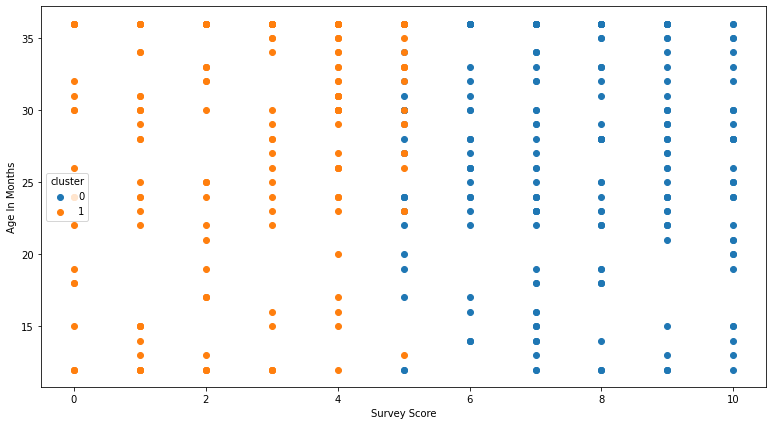

In [31]:
# visualize the data using clusters as hue
fig, ax = plt.subplots(figsize=(13, 7))

for cluster, subset in X_train.groupby('cluster'):
    ax.scatter(subset.survey_score, subset.age_mons, label=cluster)
ax.legend(title='cluster')
ax.set(ylabel='Age In Months', xlabel='Survey Score')

In [32]:
kmeans.inertia_

792.7217982918714

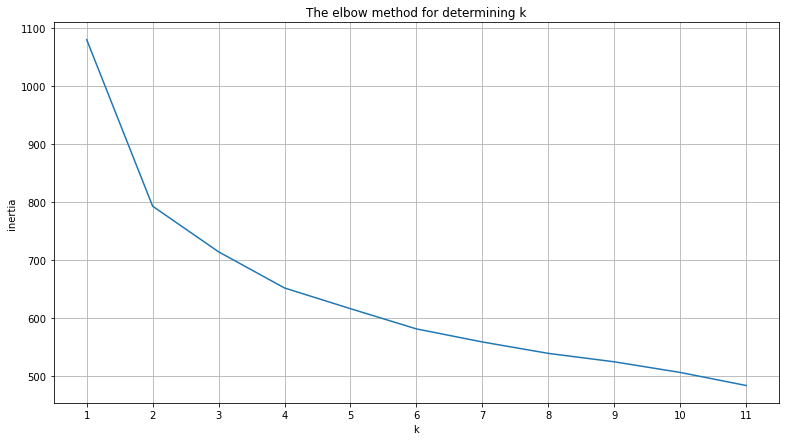

In [33]:
# find the pivot point
# 2 is the maximum clusters we should create
output = {}

for k in range(1, 12):
    kmeans = KMeans(n_clusters=k)
    kmeans.fit(X1)
    output[k] = kmeans.inertia_

ax = pd.Series(output).plot(figsize=(13, 7))
ax.set(xlabel='k', ylabel='inertia', xticks=range(1, 12), title='The elbow method for determining k')
ax.grid()

([0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10],
 <a list of 11 Text major ticklabel objects>)

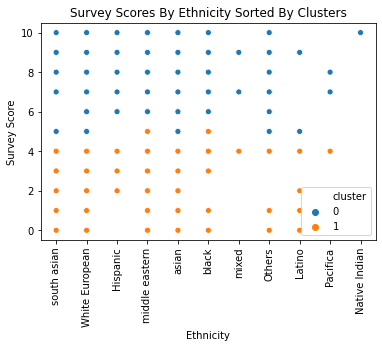

In [34]:
# graph ethnicity scores using clusters and hue
sns.scatterplot(x='ethnicity', y='survey_score', hue='cluster', data=X_train, palette='tab10')
plt.ylabel('Survey Score')
plt.xlabel('Ethnicity')
plt.gcf().axes[0].yaxis.get_major_formatter().set_scientific(False)
plt.title('Survey Scores By Ethnicity Sorted By Clusters')
plt.xticks(rotation = 90)

In [35]:
X_train.head()

,a1,a2,a3,a4,a5,a6,a7,a8,a9,a10,age_mons,survey_score,ethnicity,whocompletedthetest,is_male,has_jaundice,has_fam_history,is_white,is_hispanic,is_black,is_asian,is_middle_eastern,is_other,cluster
988,0,0,0,0,1,0,1,1,0,1,36,4,south asian,family member,1,1,0,0,0,0,1,0,0,1
281,1,1,1,1,1,1,1,1,1,0,27,9,White European,family member,1,0,0,1,0,0,0,0,0,0
945,0,0,1,1,1,1,1,1,1,0,15,7,White European,family member,1,1,0,1,0,0,0,0,0,0
286,0,0,0,0,1,1,1,0,0,1,31,4,Hispanic,family member,1,1,0,0,1,0,0,0,0,1
129,1,1,0,1,1,1,1,0,0,1,36,7,middle eastern,family member,1,0,0,0,0,0,0,1,0,0


## Logistic Regression Model

### Train Data

In [36]:
# fit the model to the train dataset
logit = LogisticRegression(random_state=123)
logit.fit(X_train_scaled, y_train)
print('Columns:', X_train_scaled.columns )
print('Coefficient:', logit.coef_)
print('Intercept:', logit.intercept_)

Columns: Index(['a1', 'a2', 'a3', 'a4', 'a5', 'a6', 'a7', 'a8', 'a9', 'a10', 'age_mons',
       'is_male', 'cluster'],
      dtype='object')
Coefficient: [[ 1.75902397  2.02402943  1.58239587  1.92428806  1.59603546  1.90263453
   1.95557676  2.01467271  2.19082592  1.90721844  0.28683457  0.24231776
  -0.8096673 ]]
Intercept: [-5.93729935]


In [37]:
# create columns for actuals and predicitons
train_eval = y_train[['has_asd']].rename(columns={'has_asd': 'actual'})

train_eval['predict'] = logit.predict(X_train_scaled)

# create column for probabilities
train_eval['probs'] = logit.predict_proba(X_train_scaled)[:, 1]

train_eval.head()

,actual,predict,probs
988,1,1,0.778283
281,1,1,0.999989
945,1,1,0.999451
286,1,1,0.747230
129,1,1,0.999529


### Validate Data

In [38]:
# same as above, but on validate
validate_eval = y_validate[['has_asd']].rename(columns={'has_asd': 'actual'})

validate_eval['predict'] = logit.predict(X_validate_scaled)

validate_eval['probs'] = logit.predict_proba(X_validate_scaled)[:, 1]

validate_eval.head()

,actual,predict,probs
638,0,0,0.321324
739,0,0,0.100518
845,0,0,0.073489
867,0,0,0.013248
520,1,1,0.783235


In [39]:
# visualize the true positives and negatives
confusion_matrix(y_true=validate_eval.actual, y_pred=validate_eval.predict)

array([[ 99,   0],
       [  0, 196]])

### Comparing Train and Validate Data

In [40]:
# print the results of the model for train
print(classification_report(y_true=train_eval.actual, y_pred=train_eval.predict))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00       123
           1       1.00      1.00      1.00       319

    accuracy                           1.00       442
   macro avg       1.00      1.00      1.00       442
weighted avg       1.00      1.00      1.00       442



In [41]:
# print accuracy of model
print('Accuracy of Logistic Regression Model on training set: {:.2f}'
     .format(logit.score(X_train_scaled, y_train)))

Accuracy of Logistic Regression Model on training set: 1.00


In [42]:
# print results of the model on validate
print(classification_report(y_true=validate_eval.actual, y_pred=validate_eval.predict))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        99
           1       1.00      1.00      1.00       196

    accuracy                           1.00       295
   macro avg       1.00      1.00      1.00       295
weighted avg       1.00      1.00      1.00       295



In [43]:
# print accuracy
print('Accuracy of Logistic Regression Model classifier on validate set: {:.2f}'
     .format(logit.score(X_validate_scaled, y_validate)))

Accuracy of Logistic Regression Model classifier on validate set: 1.00


## Conclusions
- The model most definitely beat the baseline
- I went back and triple checked for any potential overfitting
- The model is 100 percent accurate at predicting asd based on the key features
- The questions reponses, age of child, and sex are the most important features for diagnosing asd

## Decision Tree Model - Max Depth 2

In [44]:
# assign decision tree to a variable
# set depth to 4 as a starting point to prevent overfit
clf = DecisionTreeClassifier(max_depth=2, random_state=123)

### Train Data

In [45]:
# fit train data
clf.fit(X_train_scaled, y_train)

DecisionTreeClassifier(max_depth=2, random_state=123)

In [46]:
# assign predicitons to variable
y_pred_dec_tree = clf.predict(X_train_scaled)
y_pred_dec_tree[0:5]

array([1, 1, 1, 1, 1], dtype=uint8)

In [47]:
# assign probabilities to variable
y_pred_proba_dec_tree = clf.predict_proba(X_train_scaled)
y_pred_proba_dec_tree[0:5]

array([[0.38461538, 0.61538462],
       [0.        , 1.        ],
       [0.        , 1.        ],
       [0.38461538, 0.61538462],
       [0.        , 1.        ]])

In [48]:
# visualize TP, FP, FN, TN
confusion_matrix(y_train, y_pred_dec_tree)

array([[ 93,  30],
       [ 28, 291]])

In [49]:
# print accuracy
print('Accuracy of Decision Tree classifier on training set: {:.2f}'
     .format(clf.score(X_train_scaled, y_train)))

Accuracy of Decision Tree classifier on training set: 0.87


In [50]:
# print results of train model
print(classification_report(y_train, y_pred_dec_tree))

              precision    recall  f1-score   support

           0       0.77      0.76      0.76       123
           1       0.91      0.91      0.91       319

    accuracy                           0.87       442
   macro avg       0.84      0.83      0.84       442
weighted avg       0.87      0.87      0.87       442



### Validate Data

In [51]:
# assing predictions to a variable
y_pred_dec_tree = clf.predict(X_validate_scaled)
y_pred_dec_tree[0:5]

array([0, 0, 1, 0, 1], dtype=uint8)

In [52]:
# assign probabilities to a varaible
y_pred_proba_dec_tree = clf.predict_proba(X_validate_scaled)
y_pred_proba_dec_tree[0:5]

array([[0.76859504, 0.23140496],
       [0.76859504, 0.23140496],
       [0.38461538, 0.61538462],
       [0.76859504, 0.23140496],
       [0.38461538, 0.61538462]])

In [53]:
# Visualize TP, FP, FN, TN
confusion_matrix(y_validate, y_pred_dec_tree)

array([[ 72,  27],
       [ 15, 181]])

In [54]:
print('Accuracy of Decision Tree classifier on validate set: {:.2f}'
     .format(clf.score(X_validate_scaled, y_validate)))

Accuracy of Decision Tree classifier on validate set: 0.86


In [55]:
print(classification_report(y_validate, y_pred_dec_tree))

              precision    recall  f1-score   support

           0       0.83      0.73      0.77        99
           1       0.87      0.92      0.90       196

    accuracy                           0.86       295
   macro avg       0.85      0.83      0.84       295
weighted avg       0.86      0.86      0.86       295



## Conclusion
- The model did beat the baseline, but did not get as close as the logression model

## Decision Tree Model - Max Depth 3

In [56]:
# Assess based on max depth 3
clf = DecisionTreeClassifier(max_depth=3, random_state=123)

### Train Data

In [57]:
# fit train data
clf.fit(X_train_scaled, y_train)

DecisionTreeClassifier(max_depth=3, random_state=123)

In [58]:
# assign predictions to a variable
y_pred_dec_tree = clf.predict(X_train_scaled)
y_pred_dec_tree[0:5]

array([1, 1, 1, 1, 1], dtype=uint8)

In [59]:
# assign probabilities to a variable
y_pred_proba_dec_tree = clf.predict_proba(X_train_scaled)
y_pred_proba_dec_tree[0:5]

array([[0.49152542, 0.50847458],
       [0.        , 1.        ],
       [0.        , 1.        ],
       [0.49152542, 0.50847458],
       [0.        , 1.        ]])

In [60]:
confusion_matrix(y_train, y_pred_dec_tree)

array([[ 80,  43],
       [  9, 310]])

In [61]:
print('Accuracy of Decision Tree classifier on training set: {:.2f}'
     .format(clf.score(X_train_scaled, y_train)))

Accuracy of Decision Tree classifier on training set: 0.88


In [62]:
print(classification_report(y_train, y_pred_dec_tree))

              precision    recall  f1-score   support

           0       0.90      0.65      0.75       123
           1       0.88      0.97      0.92       319

    accuracy                           0.88       442
   macro avg       0.89      0.81      0.84       442
weighted avg       0.88      0.88      0.88       442



### Validate Data

In [63]:
# assign predicitons to a variable
y_pred_dec_tree = clf.predict(X_validate_scaled)
y_pred_dec_tree[0:5]

array([0, 0, 1, 0, 1], dtype=uint8)

In [64]:
# assign probabilites to a variable
y_pred_proba_dec_tree = clf.predict_proba(X_validate_scaled)
y_pred_proba_dec_tree[0:5]

array([[0.8988764 , 0.1011236 ],
       [0.8988764 , 0.1011236 ],
       [0.49152542, 0.50847458],
       [0.8988764 , 0.1011236 ],
       [0.05263158, 0.94736842]])

In [65]:
confusion_matrix(y_validate, y_pred_dec_tree)

array([[ 65,  34],
       [  9, 187]])

In [66]:
print('Accuracy of Decision Tree classifier on validate set: {:.2f}'
     .format(clf.score(X_validate_scaled, y_validate)))

Accuracy of Decision Tree classifier on validate set: 0.85


In [67]:
print(classification_report(y_validate, y_pred_dec_tree))

              precision    recall  f1-score   support

           0       0.88      0.66      0.75        99
           1       0.85      0.95      0.90       196

    accuracy                           0.85       295
   macro avg       0.86      0.81      0.82       295
weighted avg       0.86      0.85      0.85       295



## Conclusion
- This model ended up doing about the same as the previous Decision Tree Model

## Random Forest Model - Max Depth 4

In [68]:
# assign random forest to a variable
rf = RandomForestClassifier(bootstrap=True, 
                            class_weight=None, 
                            criterion='gini',
                            min_samples_leaf=3,
                            n_estimators=100,
                            max_depth=4, 
                            random_state=123)

### Train Data

In [69]:
# fit train data
rf.fit(X_train_scaled, y_train)

RandomForestClassifier(max_depth=4, min_samples_leaf=3, random_state=123)

In [70]:
print(rf.feature_importances_)

[0.0633251  0.05338352 0.01592142 0.07820832 0.04309987 0.13234584
 0.12512296 0.03780154 0.1602867  0.02580004 0.01557309 0.00439543
 0.24473616]


In [71]:
# assign predicitons
y_pred = rf.predict(X_train_scaled)

In [72]:
# assign probabilities
y_pred_proba = rf.predict_proba(X_train_scaled)

In [73]:
print('Accuracy of random forest classifier on training set: {:.2f}'
     .format(rf.score(X_train_scaled, y_train)))

Accuracy of random forest classifier on training set: 0.97


In [74]:
print(confusion_matrix(y_train, y_pred))

[[120   3]
 [  9 310]]


In [75]:
# print report
print(classification_report(y_train, y_pred))

              precision    recall  f1-score   support

           0       0.93      0.98      0.95       123
           1       0.99      0.97      0.98       319

    accuracy                           0.97       442
   macro avg       0.96      0.97      0.97       442
weighted avg       0.97      0.97      0.97       442



### Validate Data

In [76]:
# assign predicitions
y_pred = rf.predict(X_validate_scaled)

In [77]:
# assign probabilities
y_pred_proba = rf.predict_proba(X_validate_scaled)

In [78]:
print('Accuracy of random forest classifier on validate set: {:.2f}'
     .format(rf.score(X_validate_scaled, y_validate)))

Accuracy of random forest classifier on validate set: 0.97


In [79]:
print(confusion_matrix(y_validate, y_pred))

[[ 94   5]
 [  4 192]]


In [80]:
# print report
print(classification_report(y_validate, y_pred))

              precision    recall  f1-score   support

           0       0.96      0.95      0.95        99
           1       0.97      0.98      0.98       196

    accuracy                           0.97       295
   macro avg       0.97      0.96      0.97       295
weighted avg       0.97      0.97      0.97       295



## Conclusions
- Random Forest performed the second best of all the models with a 97 percent accuracy
- This model is a great backup in the event the logression model doesn't work out
- At this point, the MVP will be Logistic Regression

# MVP - Logistic Regression Model

In [81]:
# rename column and assign to variable
test_eval = y_test[['has_asd']].rename(columns={'has_asd': 'actual'})
# add predict and probs columns to dataframe
test_eval['predict'] = logit.predict(X_test_scaled)
test_eval['probs'] = logit.predict_proba(X_test_scaled)[:, 1]
test_eval.head()

,actual,predict,probs
318,1,1,0.964967
984,1,1,0.996869
646,1,1,0.997291
1016,1,1,0.963726
491,1,1,0.999999


In [82]:
confusion_matrix(y_true=test_eval.actual, y_pred=test_eval.predict)

array([[104,   0],
       [  0, 213]])

In [83]:
# print report
print(classification_report(y_true=test_eval.actual, y_pred=test_eval.predict))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00       104
           1       1.00      1.00      1.00       213

    accuracy                           1.00       317
   macro avg       1.00      1.00      1.00       317
weighted avg       1.00      1.00      1.00       317



In [84]:
print('Accuracy of Logistic Regression Model classifier on test set: {:.2f}'
     .format(logit.score(X_test_scaled, y_test)))

Accuracy of Logistic Regression Model classifier on test set: 1.00


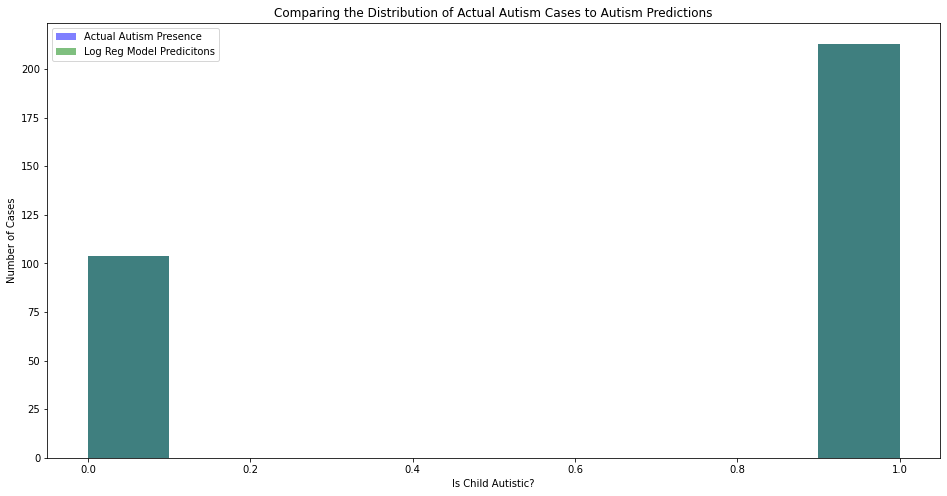

In [85]:
# visualize the predicitions vs the actuals
plt.figure(figsize=(16,8))
plt.hist(test_eval.actual, color='blue', alpha=.5, label="Actual Autism Presence")
plt.hist(test_eval.predict, color='green', alpha=.5, label="Log Reg Model Predicitons")
plt.xlabel("Is Child Autistic?")
plt.ylabel("Number of Cases")
plt.title("Comparing the Distribution of Actual Autism Cases to Autism Predictions")
plt.legend()
plt.show()

## Final Thoughts
- The MVP performed perfectly on the unseen test data without overfitting
- This model would prove useful for medical providers who would like to be able to streamline the pre diagnosis with an online survey using a website or app.
- Using the model, they would be able to prompt the parent of the patient to make an appointment for early intervention.
- In doing so, children will be able to get the care they need much sooner, rather than later.

# MVP Function To Recreate Results

In [86]:
# import mvp function
from mvp_model import mvp

mvp_model.py functions loaded successfully


              precision    recall  f1-score   support

           0       1.00      1.00      1.00       104
           1       1.00      1.00      1.00       213

    accuracy                           1.00       317
   macro avg       1.00      1.00      1.00       317
weighted avg       1.00      1.00      1.00       317

Accuracy of Logistic Regression Model classifier on test set: 1.00


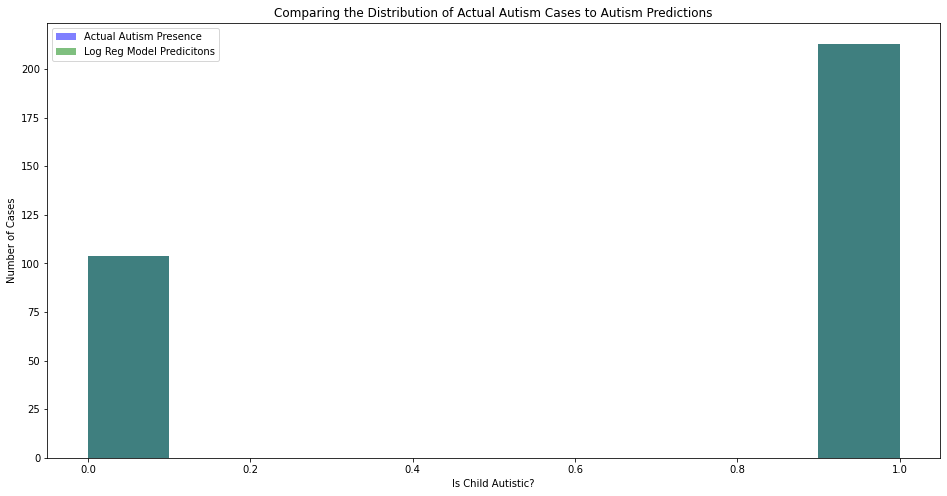

<function mvp_model.mvp()>

In [87]:
# test function
mvp()